### **IRIS**

### **LIBRERIE & IMPORT**

In [ ]:
# Librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

################ SOLO SU VS CODE ##################
#Funzione di plotting
# import os, sys
#sys.path.append(os.path.abspath(".."))
# from FUNCTIONS.utils import plot_test_predictions
###################################################

# Funzione che serve ad effettuare la divisione tra train set e test set
from sklearn.model_selection import train_test_split
# Metriche per definire la qualità del modello generato
from sklearn.metrics import accuracy_score #, mean_squared_error, classification_report
# Caricamento Dati
from sklearn.datasets import load_iris
# Per Scaling dei dati
from sklearn.preprocessing import StandardScaler
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import SVC
# NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# KMEANS
from sklearn.cluster import KMeans

### **FUNCTION PLOT**

In [ ]:
def plot_test_predictions(X_vis, y_true, y_pred, feature_names, title_label):
  plt.figure(figsize=(8,6))
  markers = ['o','s','^']
  colors = ['green','blue','red']

  for idx, cl in enumerate(np.unique(y_true)):
    correct = (y_true == cl) & (y_pred == cl)
    incorrect = (y_true == cl) & (y_pred != cl)
    plt.scatter (X_vis[correct,0], X_vis[correct,1],
                 c = colors[cl], marker = markers[cl],
                 label = f"Classe {cl} - corretto", edgecolor = 'k')
    plt.scatter (X_vis[incorrect,0], X_vis[incorrect,1],
                 facecolors = 'none', marker = markers[cl],
                 label = f"Classe {cl} - errato", edgecolor = 'k', s=100)

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.title(title_label)
  plt.legend()
  plt.grid(True)
  plt.show()

### **DATAFRAME IRIS (FIORI)**

In [ ]:
# Seme che garantisce la possibilità di replicare i dati
random_seed = 42
np.random.seed(random_seed)

# Caricamento Dati
iris = load_iris()

# Creazione Dataframe
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# In alternativa si può creare un dataframe leggendo un file parquet, csv o excel
df_iris['target'] = iris.target

df_iris.head() # Mostra solo i primi dati del DF
# display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **PLOTTING IRIS DATA**

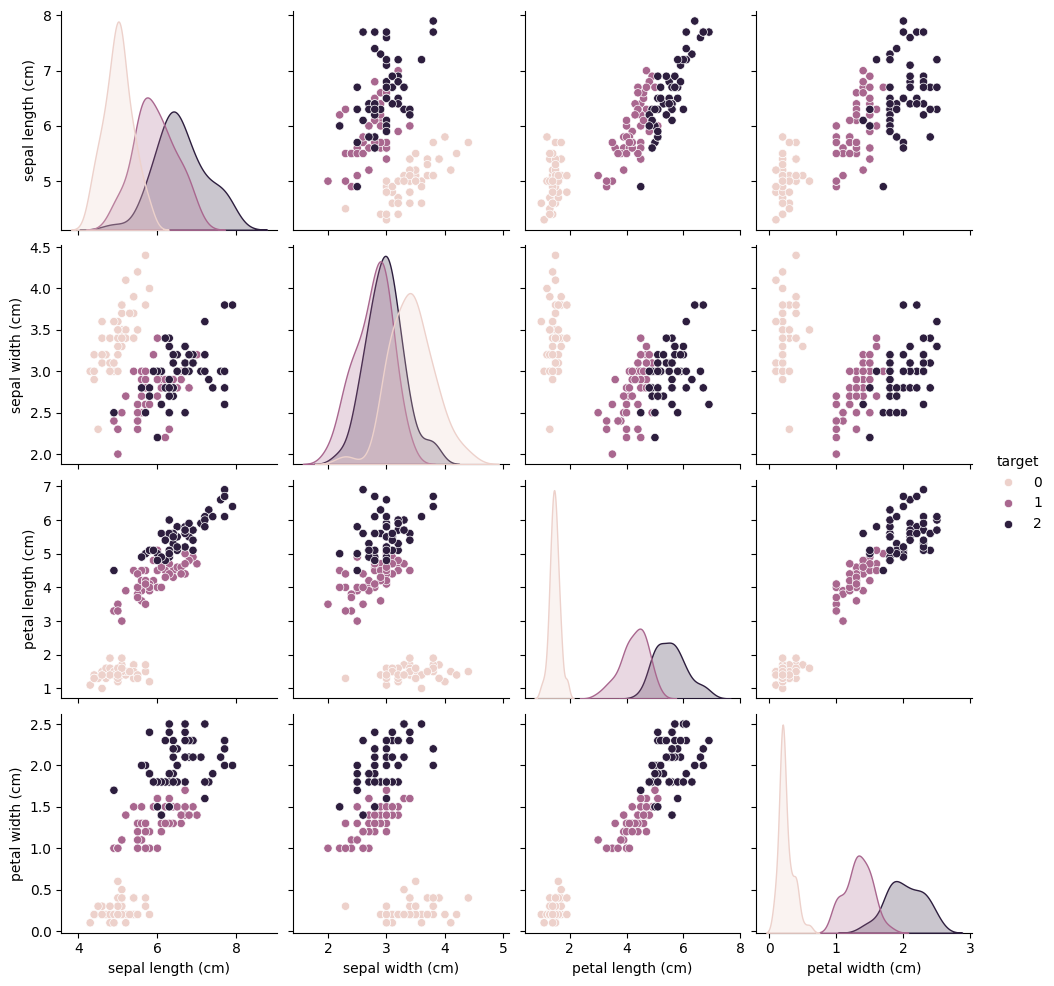

In [ ]:
# Consente di recuperare tutte le caratteristiche e plottarle (va bene per i pochi dati che abbiamo, griglia risultante 4x4)
sns.pairplot(df_iris, hue='target')
plt.show()

X = df_iris.drop('target', axis=1)
y = df_iris['target']

# train_test_split() divide i dati per allenare e testare il modello correttamente, evitando overfitting
# test_size=0.3 divide i dati 30% nel test e 70% nel train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_seed)

### **PROCESSING DEI DATI - SCALING**

[5.84285714 3.00952381 3.87047619 1.23904762]
[0.82932642 0.41691013 1.71313824 0.73917525] 



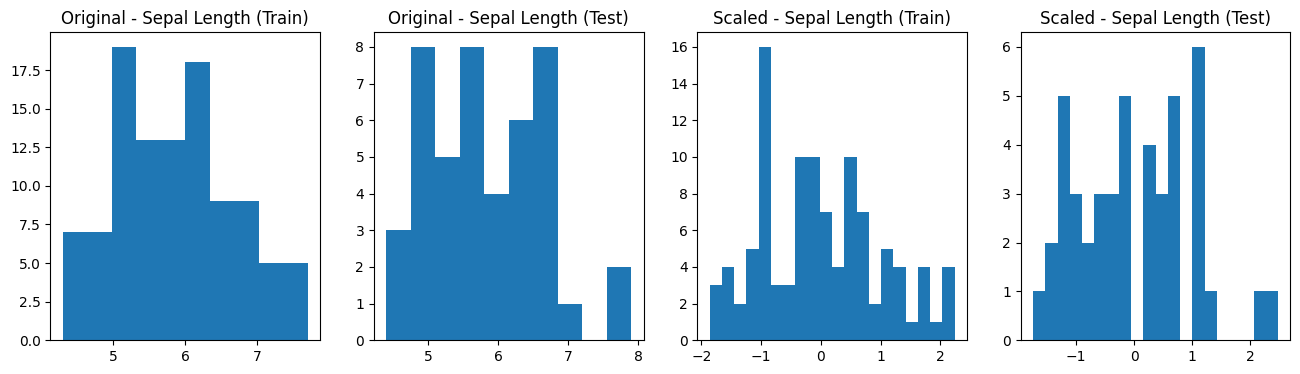

In [ ]:
scaler = StandardScaler()
# Training: calcola media e deviazione std dai dati di training
X_train_scaled = scaler.fit_transform(X_train)
# Test: usa gli STESSI parametri di training
X_test_scaled = scaler.transform(X_test)

# I parametri creati con fit_transform() vengono salvati temporaneamente in scaler durante la run e riusati con .transform()

print(scaler.mean_)   # Media di ogni feature
print(scaler.scale_,"\n")  # Deviazione standard di ogni feature

plt.figure(figsize=(16, 4))

plt.subplot(1,4,1)
plt.hist(X_train["sepal length (cm)"])
plt.title("Original - Sepal Length (Train)")

plt.subplot(1,4,2)
plt.hist(X_test["sepal length (cm)"])
plt.title("Original - Sepal Length (Test)")

plt.subplot(1,4,3)
plt.hist(X_train_scaled[:,0], bins=20)
plt.title("Scaled - Sepal Length (Train)")

plt.subplot(1,4,4)
plt.hist(X_test_scaled[:,0], bins=20)
plt.title("Scaled - Sepal Length (Test)")

# Plot dei grafici instanziati
plt.show()

### **DECISION TREE**

Decision Tree Accuracy: 1.0



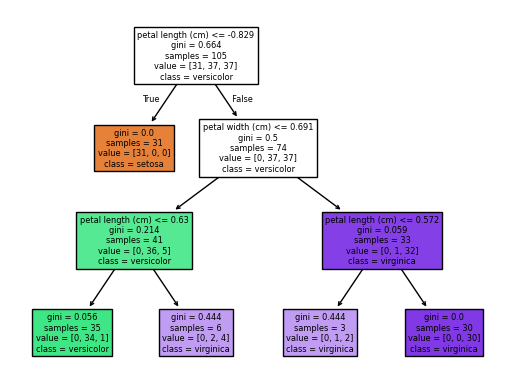

In [ ]:
# Creazione modello Decision Tree
dt = DecisionTreeClassifier(max_depth = 3)

# Allena il modello sui dati di training scalati
dt.fit(X_train_scaled, y_train)
# Usa il modello allenato per fare predizioni
y_pred = dt.predict(X_test_scaled)
# Valuta le predizioni
accuracy_tree = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy_tree}\n")

# Richiamo del plot del Decision tree
plot_tree(dt, feature_names = X.columns, class_names=iris.target_names, filled=True)

# Plot del Decision Tree
plt.show()

### **LOGISTIC REGRESSION**

In [ ]:
# Creazione modello Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Allena il modello sui dati di training scalati
model.fit(X_train_scaled, y_train)
# Usa il modello allenato per fare predizioni
y_pred_log = model.predict(X_test_scaled)
# Valuta le predizioni
accuracy_log = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log}")

Logistic Regression Accuracy: 1.0


### **PROTTING LR DATA**

In [ ]:
# Variabili da instanziare necessarie per il plotting sui grafici
feature_indices = [2,3]  # Petal length and petal width
X_test_vis = X_test_scaled[:, feature_indices]

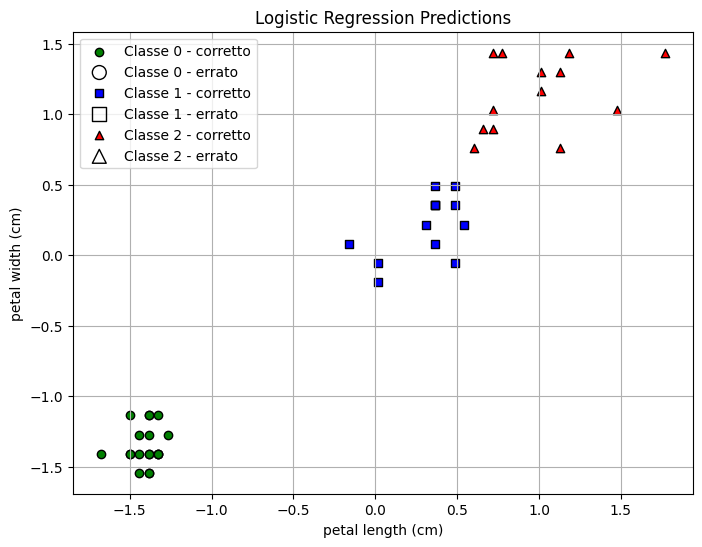

In [ ]:
# Richiamo Function per plot dati Log Reg
plot_test_predictions(X_test_vis, y_test, y_pred_log, iris.feature_names[2:4], "Logistic Regression Predictions")

### **SVM**

In [ ]:
# Predizione SVM usando SVC (MULTICLASSE)

# Creazione modello SVM
model = SVC(kernel='linear', C=1)
# L'IPERPARAMETRO "C" è la Penality di Misclassification
# -> C = 1 (valore di default) darà un vale di accuracy peggiore della LR
# -> C = 1000 il valore di accuracy torna a 1

# Allena il modello sui dati di training scalati
model.fit(X_train_scaled, y_train)
# Valuta le predizioni
y_pred_svm = model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 1.0


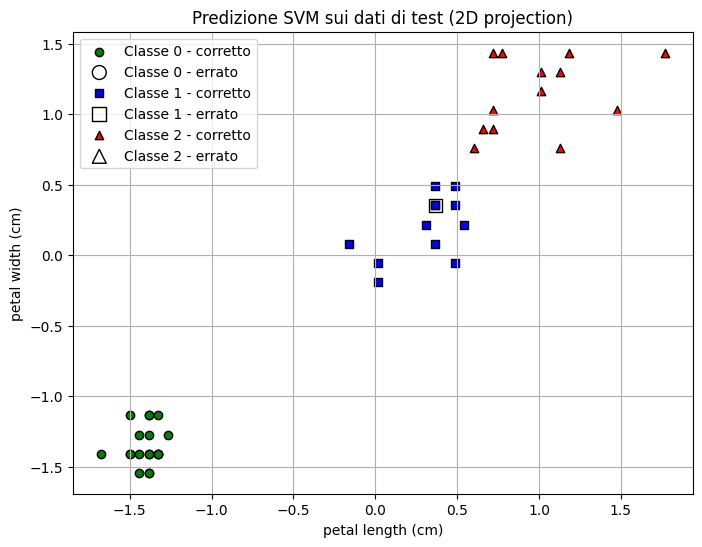

In [ ]:
#Richiamo Funcion per plot dati SVM
plot_test_predictions(X_test_vis, y_test, y_pred_svm, iris.feature_names[2:4], "Predizione SVM sui dati di test (2D projection)")

### **NEURAL NETWORK**

In [ ]:
# Predizione usando il MultiLayerPercepton

# Creazione modello MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,9), max_iter=1000)
# Allena il modello sui dati di training scalati
mlp.fit(X_train_scaled, y_train)
# Valuta le predizioni
y_pred_mlp = mlp.predict(X_test_scaled)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp}")

Neural Network Accuracy: 1.0


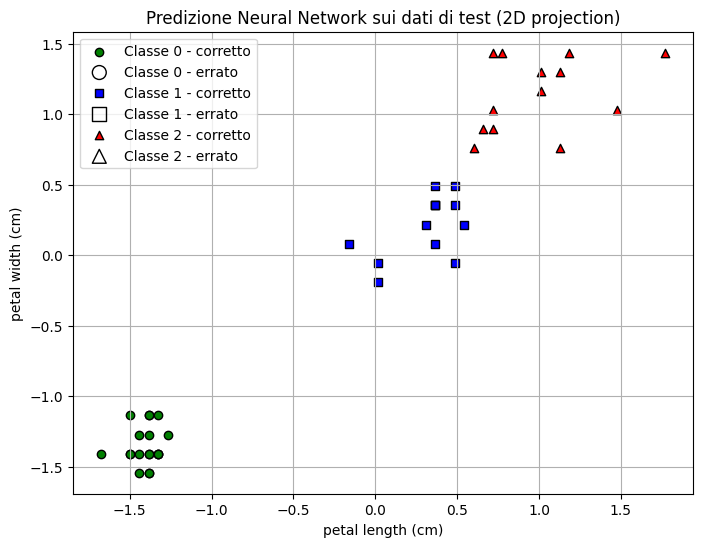

In [ ]:
#Richiamo Funcion per plot dati MLP
plot_test_predictions(X_test_vis, y_test, y_pred_mlp, iris.feature_names[2:4], "Predizione Neural Network sui dati di test (2D projection)")

### **KNN**

In [ ]:
# Predizione usando il valore dei 5 vicini

# Creazione modello KNN
knn = KNeighborsClassifier(n_neighbors=5)
# Allena il modello sui dati di training scalati
knn.fit(X_train_scaled, y_train)
# Valuta le predizioni
y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 1.0


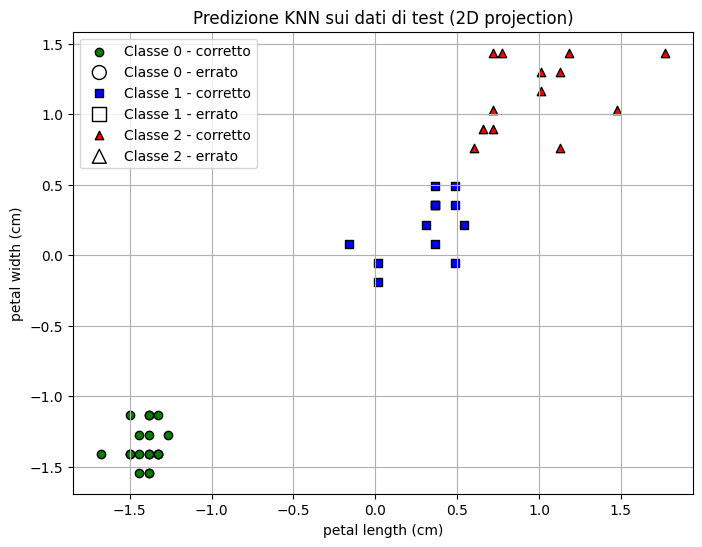

In [ ]:
#Richiamo Funcion per plot dati KNN
plot_test_predictions(X_test_vis, y_test, y_pred_knn, iris.feature_names[2:4], "Predizione KNN sui dati di test (2D projection)")

### **K-MEANS**

In [ ]:
# Predizione cluster sapendo che ci siano solo 3 cluster
# E' possibile usare questo modello solo perché abbiamo le label di output

# Creazione modello KMEANS
kmeans = KMeans(n_clusters=3, random_state=random_seed)
# Allena il modello sui dati di training scalati
kmeans.fit(X_train, y_train)
# Valuta le predizioni
y_pred_kmeans = kmeans.predict(X_test)
y_pred_kmeans = np.mod(y_pred_kmeans-1, 3) # Per Metchare le Label

accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print(f"K-Means Accuracy: {accuracy_kmeans}")

K-Means Accuracy: 0.9333333333333333


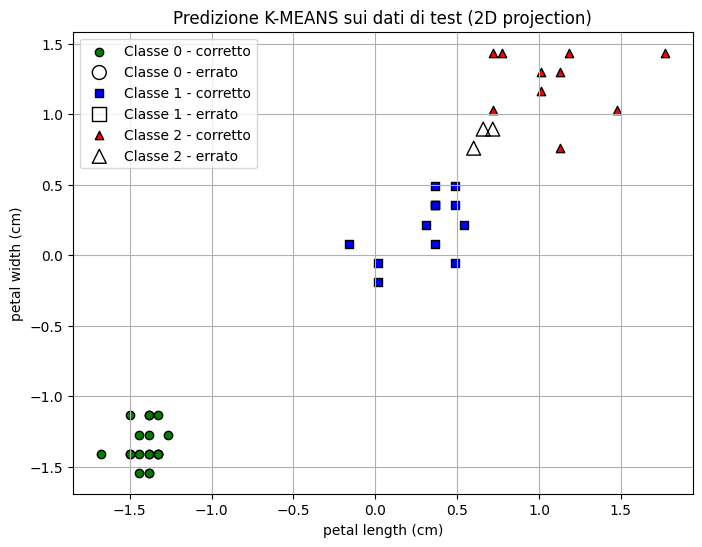

In [ ]:
#Richiamo Funcion per plot dati KNN
plot_test_predictions(X_test_vis, y_test, y_pred_kmeans, iris.feature_names[2:4], "Predizione K-MEANS sui dati di test (2D projection)")

### **CONSIDERAZIONI**

**Quando è necessario lo scaling dei dati?**

Lo scaling (normalizzazione) è necessario in specifiche situazioni

*Quando è **NECESSARIO**:*

**Algoritmi basati su distanza:**

* *KNN (K-Nearest Neighbors)*
* *K-Means*
* *SVM (Support Vector Machine)*

Perché: Se una feature ha valori 0-100 e un'altra 0-1, la prima domina il calcolo delle distanze.

**Algoritmi basati su gradient descent:**

* *Regressione Logistica*
* *Reti Neurali*
* *Linear Regression con regularization*

Perché: L'ottimizzazione converge più velocemente con dati normalizzati.

**Algoritmi con regularization (L1, L2):**

* *Ridge Regression*
* *Lasso Regression*

Perché: La penalità viene applicata equamente a tutte le features.

Quando **NON è necessario (MA consigliato):**

**Tree-based models:**

* Decision Tree
* Random Forest
* XGBoost